In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")
import os
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [68]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# 1.1

In [69]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [70]:
df.shape

(440, 9)

In [71]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# 1.1.2

In [73]:
df_total=df.copy()

In [74]:
df_total['Total_annual_Spending']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [75]:
df_total.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_annual_Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [76]:
total_spending=pd.DataFrame(df_total.groupby('Channel')['Total_annual_Spending'].sum().reset_index())
total_spending

,Channel,Total_annual_Spending
0,Hotel,7999569
1,Retail,6619931


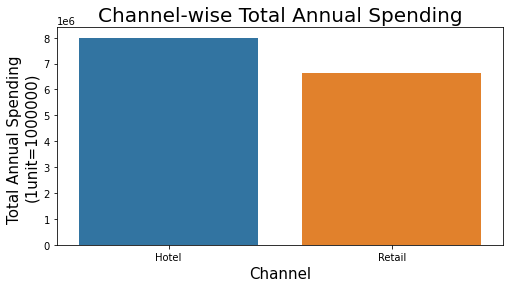

In [77]:
plt.figure(figsize=(8,4))
sns.barplot(total_spending['Channel'],total_spending['Total_annual_Spending'])
plt.title('Channel-wise Total Annual Spending',fontsize=20)
plt.xlabel("Channel",fontsize=15)
plt.ylabel("Total Annual Spending \n(1unit=1000000)",fontsize=15)
plt.show()

From the above table and graph, we can see that channel 'Hotel' spends more compared to channel 'Retail'

# 1.1.3

In [78]:
total_spending2=pd.DataFrame(df_total.groupby('Region')['Total_annual_Spending'].sum().reset_index())
total_spending2

,Region,Total_annual_Spending
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


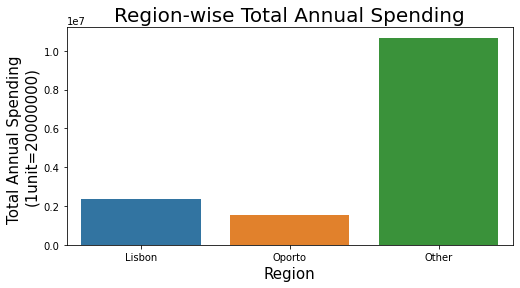

In [79]:
plt.figure(figsize=(8,4))
sns.barplot(total_spending2['Region'],total_spending2['Total_annual_Spending'])
plt.title('Region-wise Total Annual Spending',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Total Annual Spending \n(1unit=20000000)",fontsize=15)
plt.show()

From the above table and graph, we can see that Other regions spends the highest and Oporto region spends the least annually. Lisborn region spends comparitively more than Oporto region.

# 1.2

In [80]:
df.groupby('Channel').describe().T

Channel                         Hotel        Retail
Buyer/Spender    count     298.000000    142.000000
                 mean      238.369128    183.000000
                 std       120.910343    132.136132
                 min         4.000000      1.000000
                 25%       137.250000     61.250000
                 50%       241.500000    166.500000
                 75%       344.500000    303.750000
                 max       440.000000    438.000000
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

In [38]:
df.groupby('Region').describe().T

Region                        Lisbon        Oporto          Other
Buyer/Spender    count     77.000000     47.000000     316.000000
                 mean     235.000000    317.000000     202.613924
                 std       22.371857     13.711309     143.615303
                 min      197.000000    294.000000       1.000000
                 25%      216.000000    305.500000      79.750000
                 50%      235.000000    317.000000     158.500000
                 75%      254.000000    328.500000     361.250000
                 max      273.000000    340.000000     440.000000
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

In [81]:
df.groupby('Channel').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [82]:
CV_Channel=df.groupby('Channel').std()/df.groupby('Channel').mean()
CV_Channel

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,0.507240,1.026428,1.260867,0.894849,1.505745,1.396596,2.222828
Retail,0.722055,1.009365,0.903246,0.751543,1.096932,0.865408,1.114267


In [83]:
df.groupby('Channel').min()

,Buyer/Spender,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,,
Hotel,4,Lisbon,3,55,3,25,3,3
Retail,1,Lisbon,18,928,2743,33,332,3


In [84]:
df.groupby('Region').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [85]:
CV_Region=df.groupby('Region').std()/df.groupby('Region').mean()
CV_Region

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,0.095199,1.041049,1.039815,1.147670,1.030599,1.587430,0.993008
Oporto,0.043253,0.848318,1.145076,1.176182,2.262291,1.766718,0.906043
Other,0.708813,1.068277,1.327648,1.207808,1.446761,1.630040,1.994680


In [86]:
df.groupby('Region').min()

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,,
Lisbon,197,Hotel,18,258,489,61,5,7
Oporto,294,Hotel,3,333,1330,131,15,51
Other,1,Hotel,3,55,3,25,3,3


In [87]:
df.groupby('Channel').max()

,Buyer/Spender,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,,
Hotel,440,Other,112151,43950,21042,60869,6907,47943
Retail,438,Other,44466,73498,92780,11559,40827,16523


In [88]:
df.groupby('Region').max()

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,,
Lisbon,273,Retail,56083,28326,39694,18711,19410,6854
Oporto,340,Retail,32717,25071,67298,60869,38102,5609
Other,440,Retail,112151,73498,92780,36534,40827,47943


# 1.3

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# 1.4

In [12]:
num_df=df.select_dtypes(include=['int64','float64'])

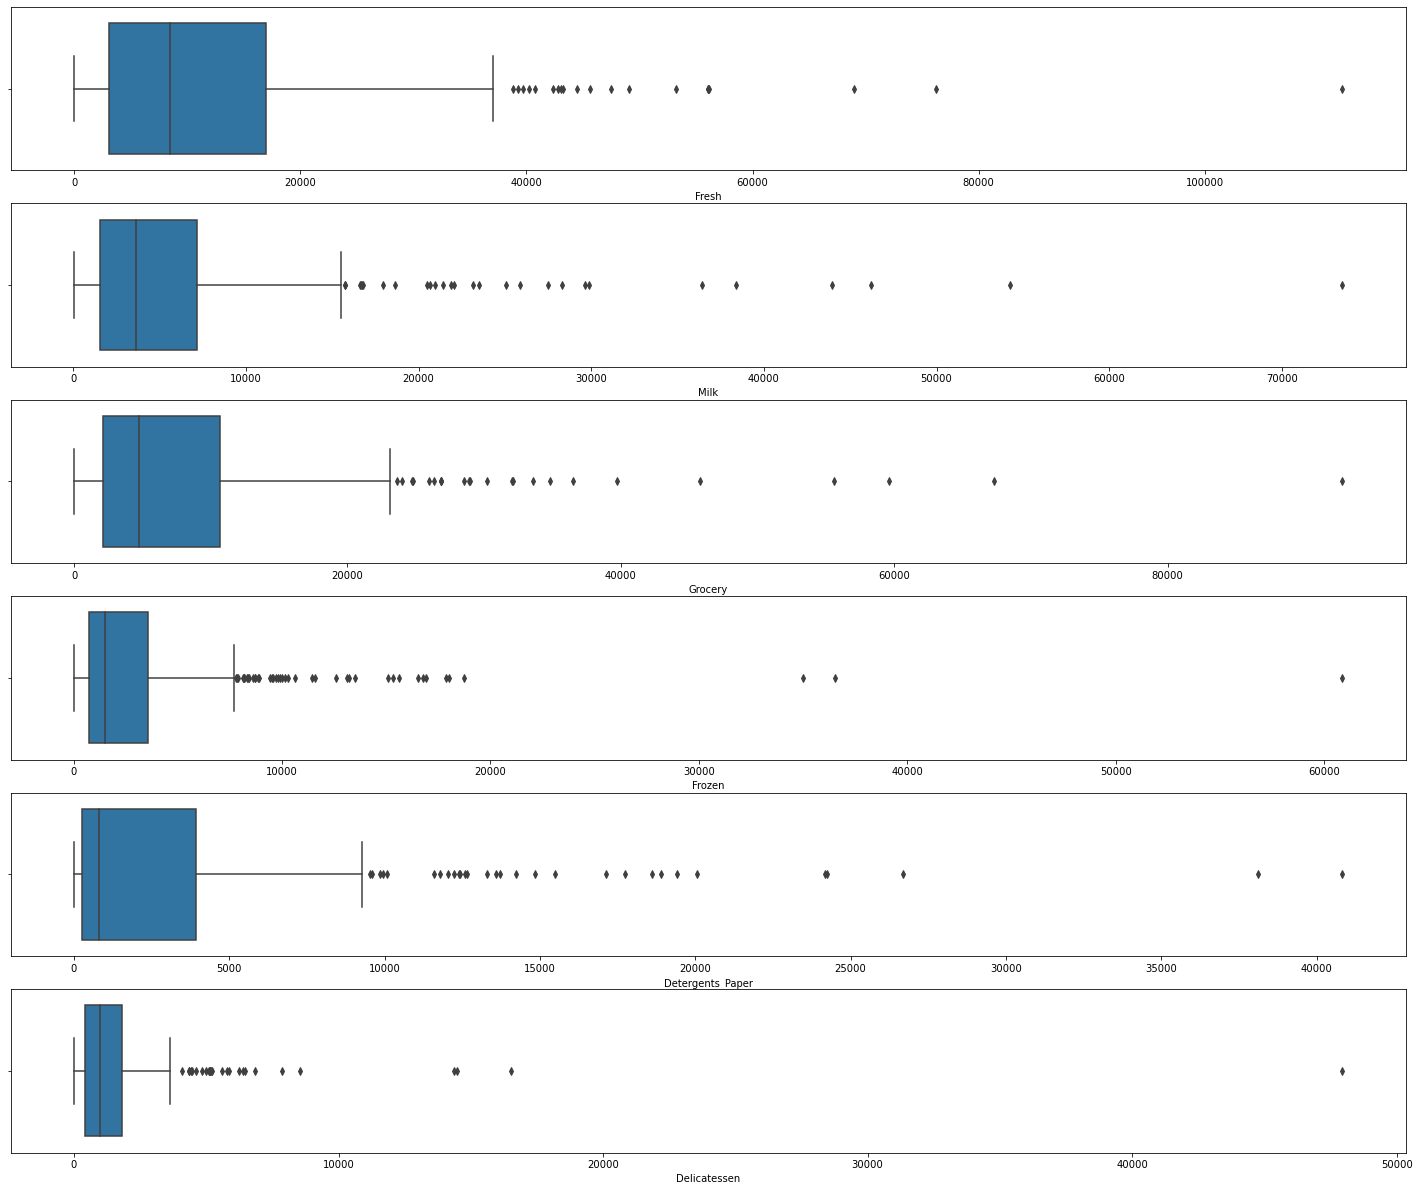

In [16]:
plt.figure(figsize=(25,50))
for i in range(1,len(num_df.columns)):
    plt.subplot(14,1,i+1)
    sns.boxplot(num_df[num_df.columns[i]])


# 2.1

In [4]:
df2=pd.read_csv('Survey-1.csv')

In [5]:
df2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [33]:
pd.crosstab(df2['Major'],df2['Gender'],margins=True)

Gender,Female,Male,All
Major,,,
Accounting,3,4,7
CIS,3,1,4
Economics/Finance,7,4,11
International Business,4,2,6
Management,4,6,10
Other,3,4,7
Retailing/Marketing,9,5,14
Undecided,0,3,3
All,33,29,62


In [34]:
pd.crosstab(df2['Grad Intention'],df2['Gender'],margins=True)

Gender,Female,Male,All
Grad Intention,,,
No,9,3,12
Undecided,13,9,22
Yes,11,17,28
All,33,29,62


In [35]:
pd.crosstab(df2['Employment'],df2['Gender'],margins=True)

Gender,Female,Male,All
Employment,,,
Full-Time,3,7,10
Part-Time,24,19,43
Unemployed,6,3,9
All,33,29,62


In [36]:
pd.crosstab(df2['Computer'],df2['Gender'],margins=True)

Gender,Female,Male,All
Computer,,,
Desktop,2,3,5
Laptop,29,26,55
Tablet,2,0,2
All,33,29,62


# 2.2

In [24]:
df2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [25]:
df2['Gender'].value_counts().sum()

62

## 2.2.1

In [29]:
Count_of_male= 29
Total_count= 62
Probability_Male=round((Count_of_male/Total_count)*100,2)
print(Probability_Male)

46.77


## 2.2.2

In [30]:
Count_of_female= 33
Total_count= 62
Probability_Female=round((Count_of_female/Total_count)*100,2)
print(Probability_Female)

53.23


# 2.6

In [51]:
NewGrad=df2[(df2['Grad Intention']!='Undecided')]
NewGrad.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [52]:
pd.crosstab(NewGrad['Grad Intention'],NewGrad['Gender'],margins=True)

Gender,Female,Male,All
Grad Intention,,,
No,9,3,12
Yes,11,17,28
All,20,20,40


# 2.8

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'GPA'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Social Networking'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>],
       [<AxesSubplot:title={'center':'Spending'}>,
        <AxesSubplot:title={'center':'Text Messages'}>, <AxesSubplot:>]],
      dtype=object)

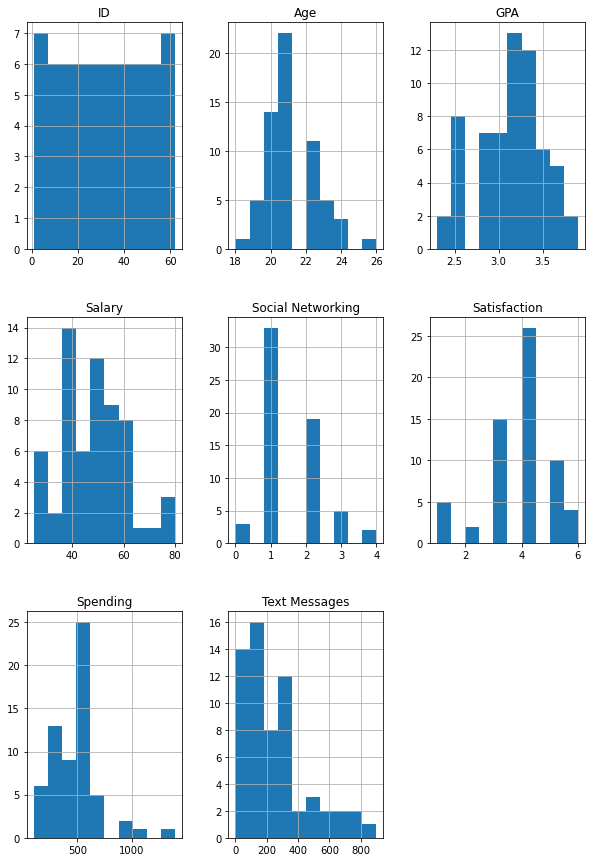

In [57]:
df2.hist(figsize=(10,15))

In [58]:
df2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


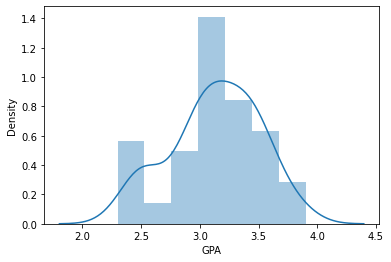

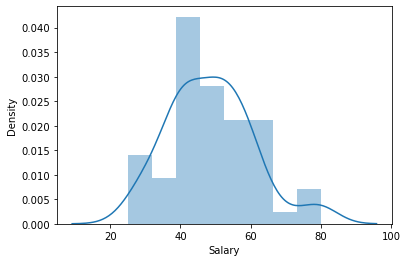

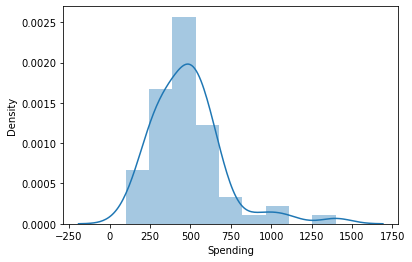

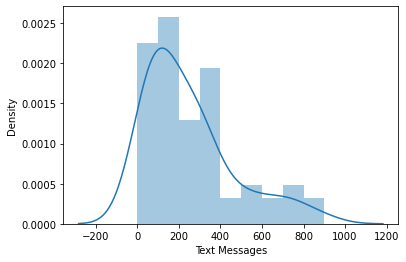

In [63]:
sns.distplot(df2['GPA'])
plt.show()
sns.distplot(df2['Salary'])
plt.show()
sns.distplot(df2['Spending'])
plt.show()
sns.distplot(df2['Text Messages'])
plt.show()



# 3.1

In [5]:
df3=pd.read_csv("A+&+B+shingles.csv")
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [6]:
# test for A shingles
t,p=ttest_1samp(df3['A'],0.35)

In [11]:
print('t: {} p: {}' .format(t,p/2))

t: -1.4735046253382782 p: 0.07477633144907513


In [9]:
# test for B shingles
t1,p1=ttest_1samp(df3['B'],0.35,nan_policy = 'omit')

In [12]:
print('t1: {} p1: {}' .format(t1,p1/2))

t1: -3.1003313069986995 p1: 0.0020904774003191826


# 3.2

In [95]:
t2,p2=ttest_ind(df3['A'],df3['B'],nan_policy = 'omit')

In [96]:
print('tstatistics is {} and p_Value is {}'.format(t2,p2))

tstatistics is 1.2896282719661123 and p_Value is 0.2017496571835306
